# Dinámica de la Población - Con Datos

By Ubiot - 2020

In [16]:
#Importar las librerías necesarias
import csv
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

#Procesamiento del archivo acerca de la población del 2002 al 2020
poblacion = Table.read_table("poblacion_2002_2020.csv", encoding='latin-1', delimiter=";")
poblacion.relabel("Nombre_provincia", "Provincia")
poblacion.relabel("nombre_comuna", "Comuna")
poblacion.relabel("Sexo (1=hombres;2=mujeres)", "Sexo")
poblacion.relabel("edad", "Edad")
poblacion.where("Edad", 30)

Region,nombre_region,provincia,Provincia,Comuna,Sexo,Edad,a2002,a2003,a2004,a2005,a2006,a2007,a2008,a2009,a2010,a2011,a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019,a2020
13,Región Metropolitana,131,Santiago,La Pintana,1,30,1.465,1.463,1.464,1.465,1.465,1.467,1.475,1.491,1.512,1.538,1.57,1.613,1.632,1.654,1.679,1.706,1.712,1.727,1.732
13,Región Metropolitana,131,Santiago,La Pintana,2,30,1.393,1.391,1.392,1.391,1.39,1.39,1.397,1.412,1.433,1.465,1.504,1.537,1.564,1.589,1.612,1.631,1.644,1.649,1.645


# Primero
Diferencia entre la cantidad de hombres de 20 años en el 2005 y la cantidad de hombres de 30 años en el 2015 para la misma localidad.

In [2]:
pob = Table().with_columns(
    "Provincia", poblacion.column("Provincia"),
    "Comuna", poblacion.column("Comuna"),
    "Sexo", poblacion.column("Sexo"),
    "Edad", poblacion.column("Edad"),
    "2005", poblacion.column("a2005"),
    "2015", poblacion.column("a2015")
)
veinte1 = pob.where("Edad", 20).where("Sexo", 1)
veinte1 = veinte1.drop("2015").drop("Edad").relabel("2005", "20 años - 2005")
treinta1 = pob.where("Edad", 30).where("Sexo", 1)
pob1 = veinte1.with_columns(
    "30 años - 2015", treinta1.column("2015"),
    "Diferencia", (veinte1.column("20 años - 2005") - (treinta1.column("2015"))),
    "Porcentaje", ((veinte1.column("20 años - 2005") - (treinta1.column("2015"))) / veinte1.column("20 años - 2005"))
)
pob1.set_format("Porcentaje", PercentFormatter)

Provincia,Comuna,Sexo,20 años - 2005,30 años - 2015,Diferencia,Porcentaje
Santiago,La Pintana,1,2.029,1.654,0.375,18.48%


# Segundo
Diferencia entre la cantidad de mujeres de 20 años en el 2005 y la cantidad de mujeres de 30 años en el 2015 para la misma localidad.

In [3]:
veinte2 = pob.where("Edad", 20).where("Sexo", 2)
veinte2 = veinte2.drop("2015").drop("Edad").relabel("2005", "20 años - 2005")
treinta2 = pob.where("Edad", 30).where("Sexo", 2)
pob2 = veinte2.with_columns(
    "30 años - 2015", treinta2.column("2015"),
    "Diferencia", (veinte2.column("20 años - 2005") - (treinta2.column("2015"))),
    "Porcentaje", ((veinte2.column("20 años - 2005") - (treinta2.column("2015"))) / veinte2.column("20 años - 2005"))
)
pob2.set_format("Porcentaje", PercentFormatter)

Provincia,Comuna,Sexo,20 años - 2005,30 años - 2015,Diferencia,Porcentaje
Santiago,La Pintana,2,1.943,1.589,0.354,18.22%


# Tercero
Teniendo los datos validamos las posibles causas de la dinámica: relaciones, analisis estadisticos.

# Cuarto
Luego haremos una comparación estadística entre el comportamiento de la población masculina contra la femenina.

# Gráfico

In [5]:
#Se unen ambas tablas
total = pob1.append(pob2)
total

Provincia,Comuna,Sexo,20 años - 2005,30 años - 2015,Diferencia,Porcentaje
Santiago,La Pintana,1,2.029,1.654,0.375,18.48%
Santiago,La Pintana,2,1.943,1.589,0.354,18.22%


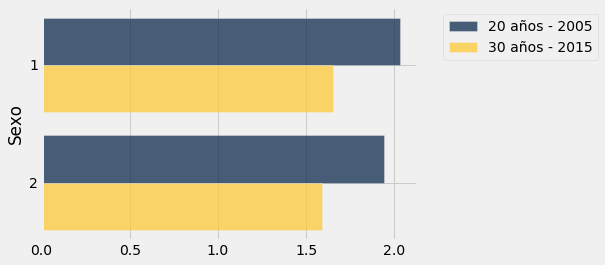

In [51]:
total.select(2, 3, 4).barh("Sexo")